In [ ]:
# !pip install PIL

# Import Statements

In [148]:
import os
import ast
import random
import numpy as np
import operator as op
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
from tensorflow.config import list_physical_devices

<h4> Checking if our machine has GPU's to handle the computation</h4>

In [140]:
gpus = list_physical_devices('GPU')

for gpu in gpus:
    print(f'Name: {gpu.name}')
    print(f'Type: {gpu.device_type}')

Name: /physical_device:GPU:0
Type: GPU


# Dataset Creation
<h4> Defining the operators to include in the dataset</h4>

In [149]:
operators = ['+', '-', '*', '/']

additive_ops = operators[:2]

In [150]:
num_range = (1, 99)

def generate_expressions(max_terms = 3):
    num_terms = random.randint(2, max_terms)
    expression = ''

    for i in range(num_terms):
        number = str(random.randint(*num_range))
        expression += number

        if i < num_terms - 1:
            symbol = random.choice(additive_ops)
            expression += f' {symbol} '
        
    return expression

In [151]:
num_samples = 18540

expression = [generate_expressions() for _ in range(num_samples)]

In [152]:
font_path = 'fonts'
fonts = [os.path.join(font_path, path) for path in os.listdir(font_path)]
fonts

['fonts/Handwritten.ttf',
 'fonts/Hello Dream.otf',
 'fonts/TheWeddingSignature-Regular.ttf',
 'fonts/phitradesign Handwritten Thin.ttf',
 'fonts/Christoper Brothers.otf']

In [153]:
def text_to_image(text, font_path = fonts, font_size = 20, img_size = (128, 128)):
    img = Image.new('L', img_size, color = 255)
    draw = ImageDraw.Draw(img)
    try:
        if font_path:
            font = ImageFont.truetype(random.choice(font_path), font_size)
        else:
            font = ImageFont.load_default()
    except OSError:
        print(f"Font not found: {font_path}. Using default font.")
        font = ImageFont.load_default()

    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    
    position = ((img_size[0] - text_width) // 2, (img_size[1] - text_height) // 2)
    draw.text(position, text, fill = 0, font=font)
    return img

images = [text_to_image(expr) for expr in expression]

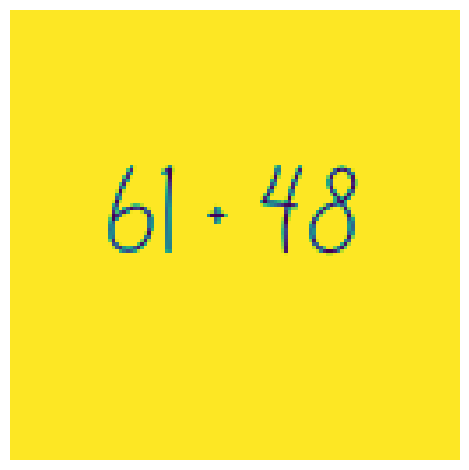

In [201]:
num = random.randint(0, len(expression) - 1)

plt.imshow(images[num])
plt.axis('off')
plt.tight_layout()
# plt.title(f'Expression: {expression[num]}, Output: {label[num]}')
plt.savefig('img01')

In [146]:
label = [eval(exp) for exp in expression]

In [126]:
def image_2_numpy(images): 
    
    image_ds = np.array([np.array(img) for img in images]).astype('float32')

    image_ds /= 255.0

    image_ds = image_ds.reshape(-1, 128, 128, 1)

    return image_ds

In [127]:
def labels_2_numpy(labels):
    return np.array(labels)

In [128]:
X = image_2_numpy(images)

In [130]:
Y_expressions = labels_2_numpy(expression)

Y_labels = labels_2_numpy(label)

In [133]:
path = 'dataset/handwritten_labels.npz'

np.savez('dataset/handwritten_labels.npz', X = X, Y = Y_labels)
np.savez('dataset/handwritten_labels.npz', X = X, Y = Y_expressions)

In [136]:
# data = np.load(path)

# X = data['X']
# Y = data['Y']

# X, Y